<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:260%;">
WiDS Datathon 2022 
 </p>

<b>Problem Statement:</b> <p> Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Addressing climate change involves mitigation (i.e. mitigating greenhouse gas emissions) and adaptation (i.e. preparing for unavoidable consequences). Mitigation of GHG emissions requires changes to electricity systems, transportation, buildings, industry, and land use. </p>

<p>According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. For example, retrofitted buildings can reduce heating and cooling energy requirements by 50-90 percent. Many of these energy efficiency measures also result in overall cost savings and yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide.</p>

<b>Goal: </b> <p>
The goal of this competition is to predict the energy consumption using building characteristics and climate and weather variables. </p>

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:200%;">
Import Libraries

 </p>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:200%;">
Import Data

 </p>

In [2]:
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
print(f"Shape of training data is {df.shape} and the shape of the test set is {test_df.shape}")

Shape of training data is (75757, 64) and the shape of the test set is (9705, 63)


In [4]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [6]:
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
Year_Factor,75757.000000,4.367755,1.471441,1.000000,3.000000,5.000000,6.000000,6.000000
floor_area,75757.000000,165983.865858,246875.790940,943.000000,62379.000000,91367.000000,166000.000000,6385382.000000
year_built,73920.000000,1952.306764,37.053619,0.000000,1927.000000,1951.000000,1977.000000,2015.000000
energy_star_rating,49048.000000,61.048605,28.663683,0.000000,40.000000,67.000000,85.000000,100.000000
ELEVATION,75757.000000,39.506323,60.656596,-6.400000,11.900000,25.000000,42.700000,1924.500000
january_min_temp,75757.000000,11.432343,9.381027,-19.000000,6.000000,11.000000,13.000000,49.000000
january_avg_temp,75757.000000,34.310468,6.996108,10.806452,29.827586,34.451613,37.322581,64.758065
january_max_temp,75757.000000,59.054952,5.355458,42.000000,56.000000,59.000000,62.000000,91.000000
february_min_temp,75757.000000,11.720567,12.577272,-13.000000,2.000000,9.000000,20.000000,48.000000
february_avg_temp,75757.000000,35.526837,8.866697,13.250000,31.625000,34.107143,40.879310,65.107143


<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:200%;">
EDA

 </p>

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Missing values
     </p>

In [7]:
cols_with_missing = [col for col in df.columns 
                                 if df[col].isnull().any()]
miss_count =df.isnull().sum()
miss_df = (pd.concat([miss_count.rename('Missing count'),miss_count.div(len(df)).rename('% Missing')],axis = 1).loc[miss_count.ne(0)])
print("Training Set:")
display(miss_df.style.background_gradient(cmap="coolwarm"))

cols_with_missing = [col for col in test_df.columns 
                                 if test_df[col].isnull().any()]
miss_count =test_df.isnull().sum()
miss_df = (pd.concat([miss_count.rename('Missing count'),miss_count.div(len(test_df)).rename('% Missing')],axis = 1).loc[miss_count.ne(0)])
print("Test Set:")
miss_df.style.background_gradient(cmap="coolwarm")

Training Set:


,Missing count,% Missing
year_built,1837,0.024249
energy_star_rating,26709,0.352561
direction_max_wind_speed,41082,0.542287
direction_peak_wind_speed,41811,0.551909
max_wind_speed,41082,0.542287
days_with_fog,45796,0.604512


Test Set:


,Missing count,% Missing
year_built,92,0.009480
energy_star_rating,2254,0.232251
direction_max_wind_speed,8575,0.883565
direction_peak_wind_speed,8575,0.883565
max_wind_speed,8575,0.883565
days_with_fog,9117,0.939413


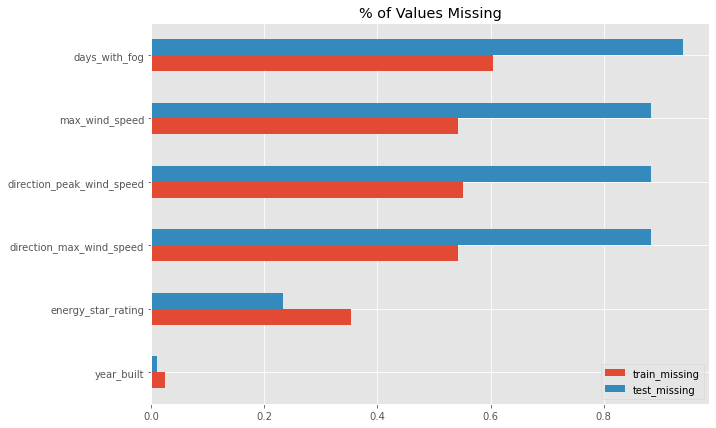

In [8]:
ncounts = pd.DataFrame([df.isna().mean(), test_df.isna().mean()]).T
ncounts = ncounts.rename(columns={0: "train_missing", 1: "test_missing"})

ncounts.query("train_missing > 0").plot(
    kind="barh", figsize=(10, 7), title="% of Values Missing"
)
plt.show()

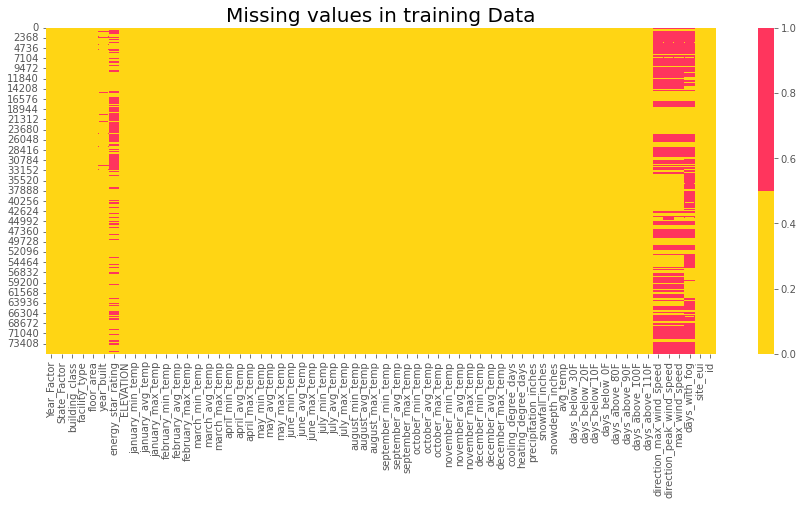

In [9]:
plt.figure(figsize = (15,6))
sns.heatmap(df.isna().values, cmap = ['#ffd514','#ff355d'], xticklabels=df.columns)
plt.title("Missing values in training Data", size=20);

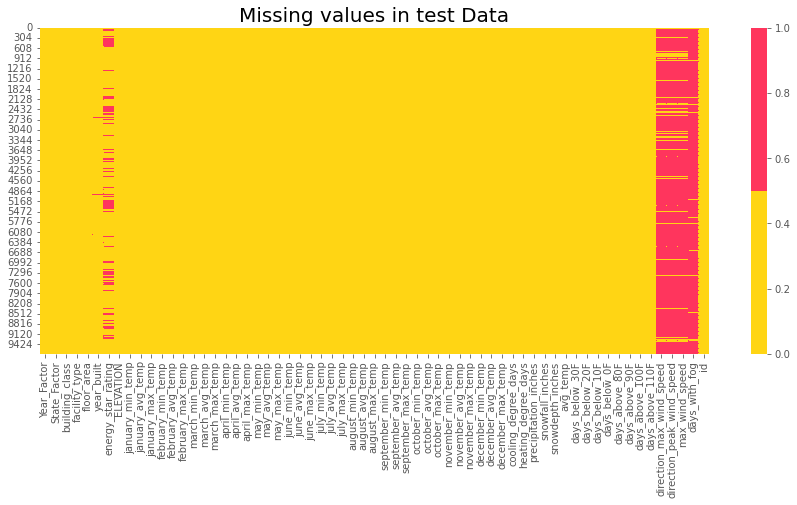

In [10]:
plt.figure(figsize = (15,6))
sns.heatmap(test_df.isna().values, cmap = ['#ffd514','#ff355d'], xticklabels=test_df.columns)
plt.title("Missing values in test Data", size=20);

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Target Variable
     </p>

In the absence of a standard or benchmark it is difficult to compare the energy uses between buildings or structures. Simply measuring the amount of energy used per a chosen time period does not take into account building size, configuration or type of use. The use of an Energy Use Intensity (EUI) indicator provides the means to equalize the way that energy use is compared between various types of buildings, and evaluate the means of reducing overall energy consumption.

Certain property types will always use more energy than others. For example, an elementary school uses relatively little energy compared to a hospital.

https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui

https://www.archtoolbox.com/materials-systems/sustainability/energy-use-intensity.html

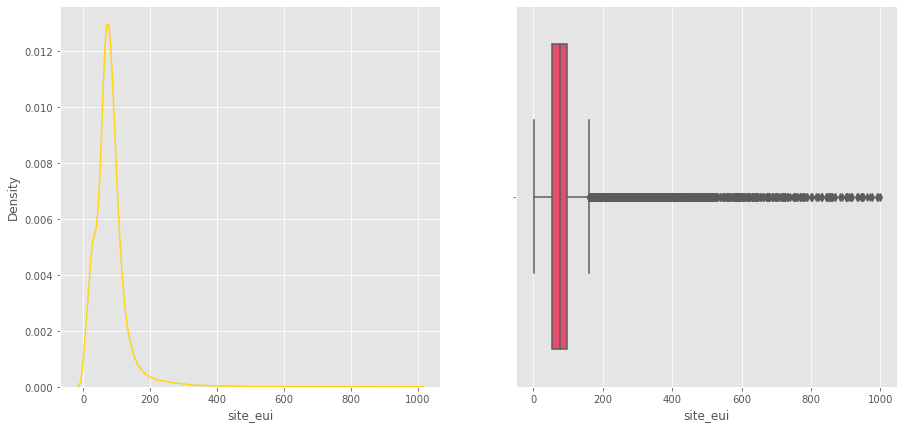

In [11]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
sns.kdeplot(df.site_eui , color = "#ffd514")
plt.subplot(122)
sns.boxplot(df.site_eui , color = "#ff355d")

This graph is positively skewed and have long right side tail. 


In [12]:
df['site_eui'].describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Categorical Data
     </p>

In [13]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['State_Factor', 'building_class', 'facility_type'], dtype='object')

#### State Factor

In [14]:
print(set(df['State_Factor']))

{'State_6', 'State_10', 'State_8', 'State_4', 'State_2', 'State_11', 'State_1'}


#### Building Class

In [15]:
print(set(df['building_class']))

{'Commercial', 'Residential'}


#### Facility Type

In [16]:
print(set(df['facility_type']))

{'Warehouse_Refrigerated', 'Warehouse_Distribution_or_Shipping_center', 'Warehouse_Uncategorized', 'Service_Drycleaning_or_Laundry', 'Office_Bank_or_other_financial', 'Education_Preschool_or_daycare', '2to4_Unit_Building', 'Food_Service_Other', 'Lodging_Uncategorized', 'Education_College_or_university', 'Lodging_Hotel', 'Data_Center', 'Food_Sales', 'Public_Safety_Penitentiary', 'Public_Assembly_Entertainment_culture', 'Service_Uncategorized', 'Public_Safety_Fire_or_police_station', 'Lodging_Other', 'Education_Uncategorized', 'Parking_Garage', 'Warehouse_Nonrefrigerated', 'Office_Medical_non_diagnostic', 'Warehouse_Selfstorage', 'Office_Uncategorized', 'Industrial', 'Retail_Strip_shopping_mall', 'Public_Assembly_Recreation', 'Public_Assembly_Drama_theater', 'Mixed_Use_Commercial_and_Residential', 'Grocery_store_or_food_market', 'Laboratory', 'Religious_worship', 'Nursing_Home', 'Public_Assembly_Other', 'Health_Care_Outpatient_Uncategorized', '5plus_Unit_Building', 'Public_Assembly_Movie

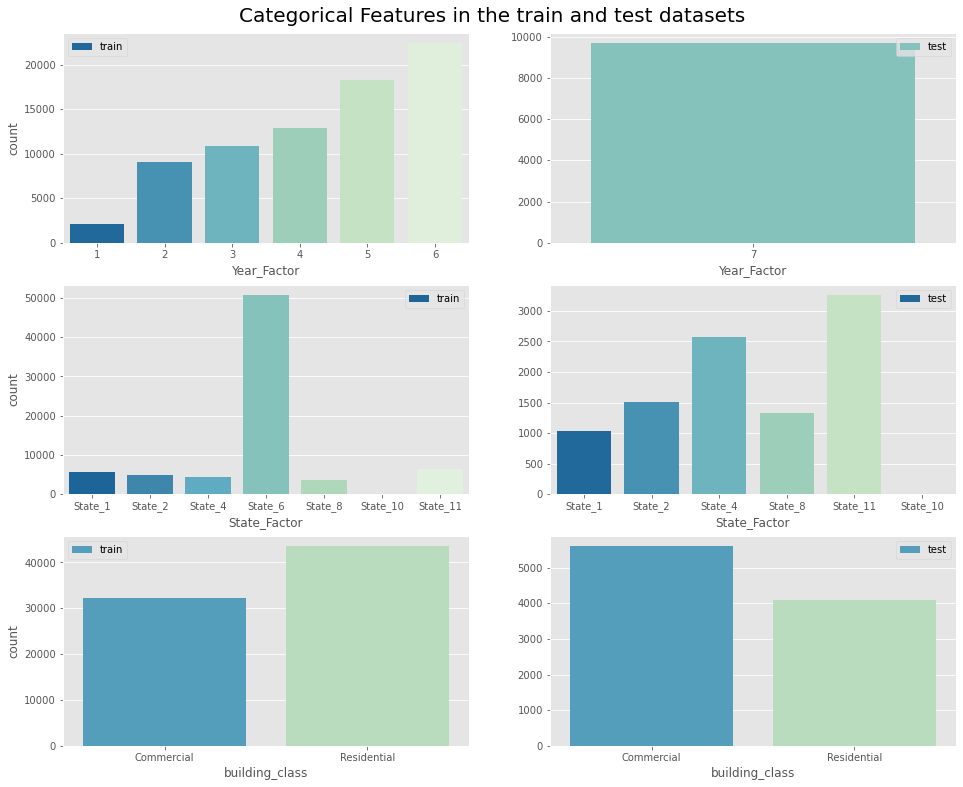

In [17]:
fig, ax = plt.subplots(3,2, figsize=(16, 12), sharey=False)
fig.subplots_adjust(top=0.95)
sns.countplot(x=df['Year_Factor'], label='train', ax = ax[0,0], palette='GnBu_r')
ax[0, 0].legend()
sns.countplot(x=test_df['Year_Factor'], label='test', ax = ax[0,1], palette='GnBu_r')
ax[0,1].legend();
ax[0,1].set_ylabel('')
sns.countplot(x=df['State_Factor'], label='train', ax = ax[1,0], palette='GnBu_r')
ax[1,0].legend();
sns.countplot(x=test_df['State_Factor'], label='test', ax = ax[1, 1], palette='GnBu_r')
ax[1,1].legend();
ax[1,1].set_ylabel('')
sns.countplot(x=df['building_class'], label='train', ax = ax[2,0], palette='GnBu_r')
ax[2,0].legend();
sns.countplot(x=test_df['building_class'], label='test', ax = ax[2,1],palette='GnBu_r')
ax[2,1].legend();
ax[2,1].set_ylabel('')
plt.suptitle('Categorical Features in the train and test datasets ', fontsize=20);

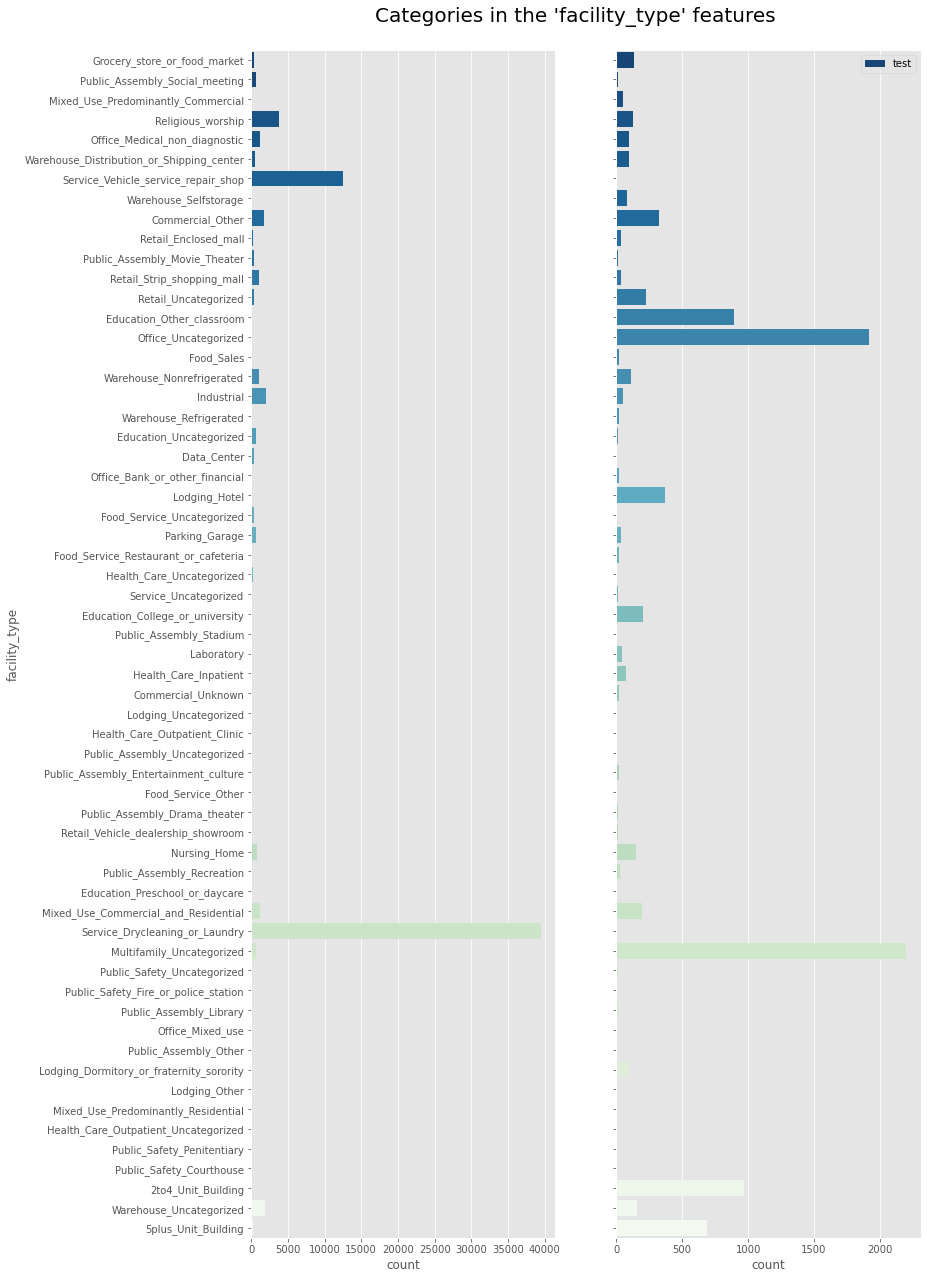

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12, 20), sharey=True)
fig.subplots_adjust(top=0.95)
sns.countplot(y=df['facility_type'], label='train', ax = ax[0], palette='GnBu_r')
sns.countplot(y=test_df['facility_type'], label='test', ax = ax[1], palette='GnBu_r')
ax[1].legend()
ax[1].set_ylabel('')
plt.suptitle("Categories in the 'facility_type' features", fontsize=20);

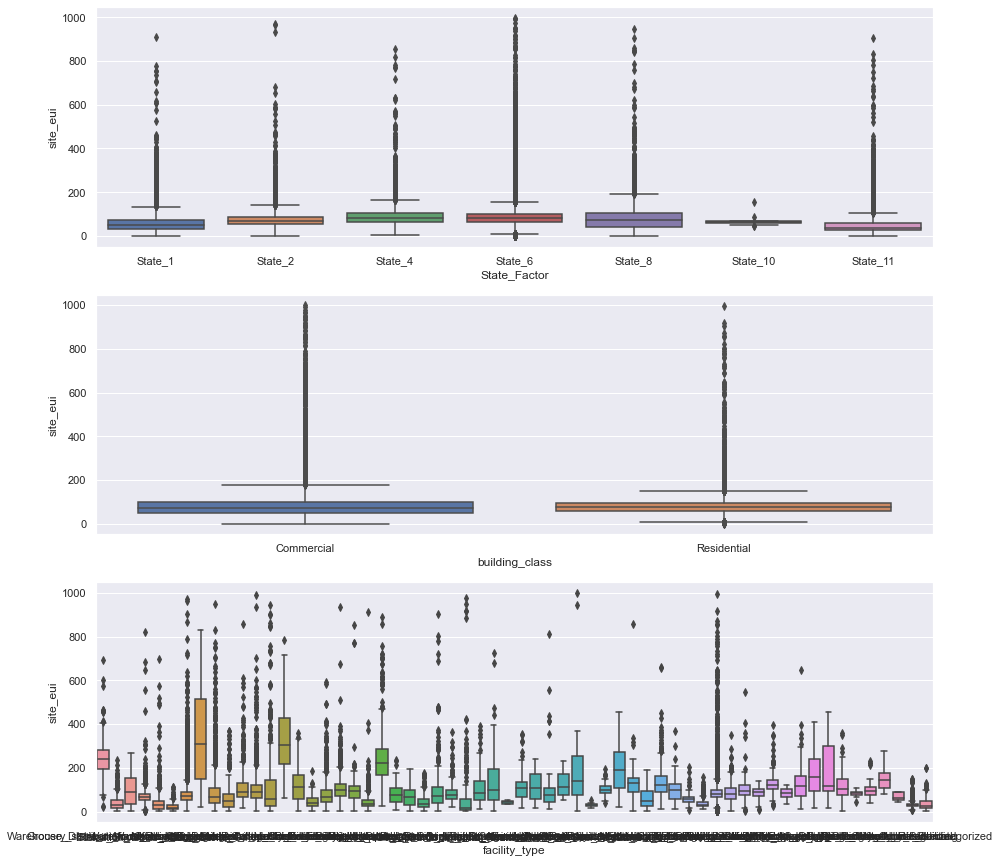

In [19]:
plt.figure(figsize=(15, 15))
sns.set(style="darkgrid")
i=1
for col in categorical_cols:
    plt.subplot(3,1,i)
    sns.boxplot(data=df, x=col, y='site_eui')
    i=i+1
plt.show()

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Numerical Data
     </p>

In [20]:
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_3

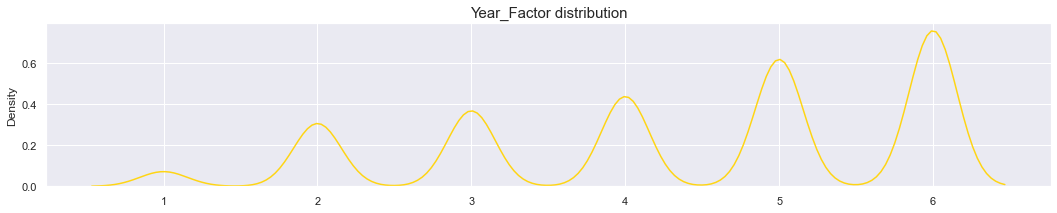

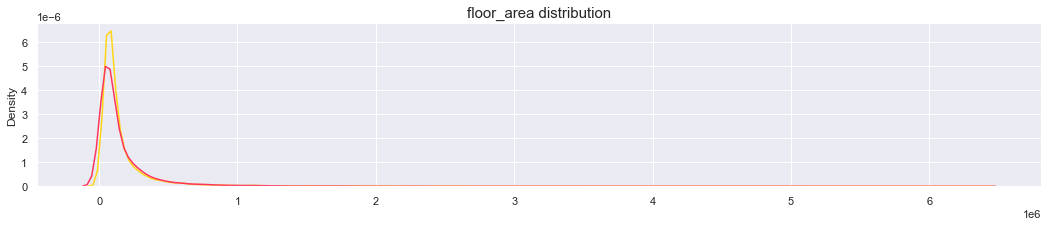

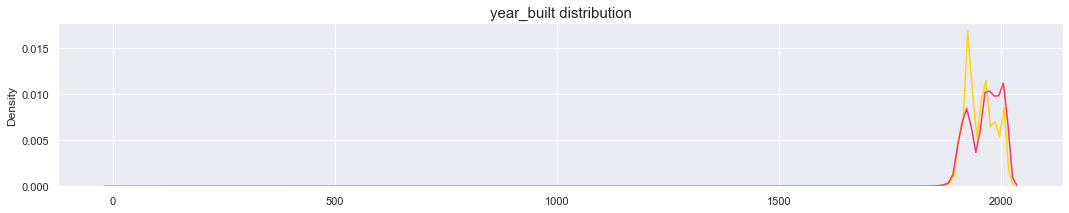

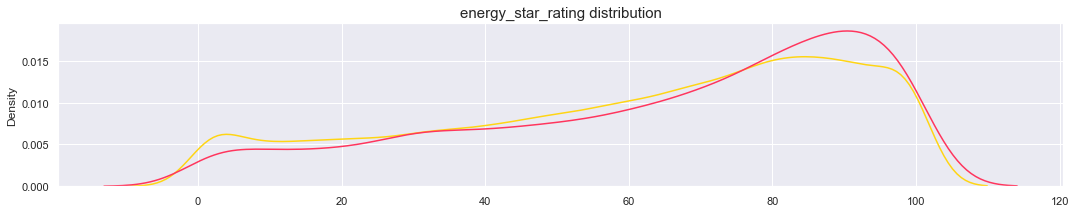

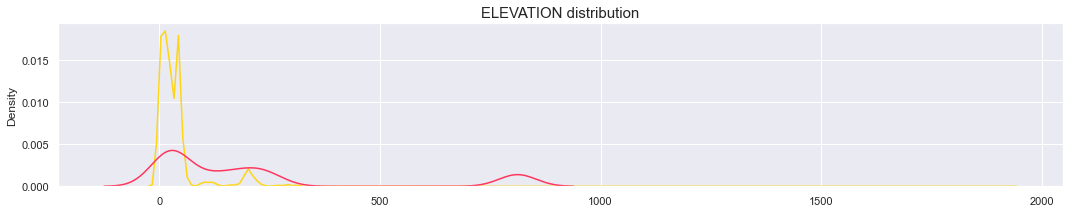

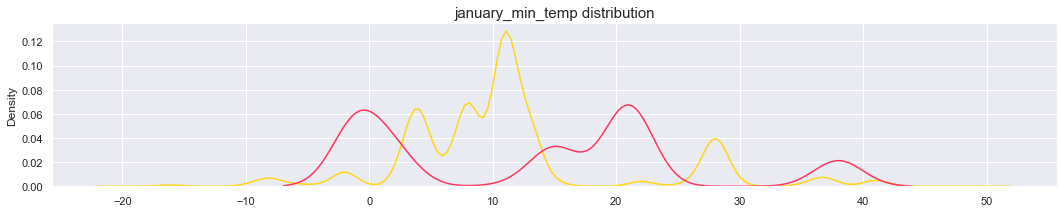

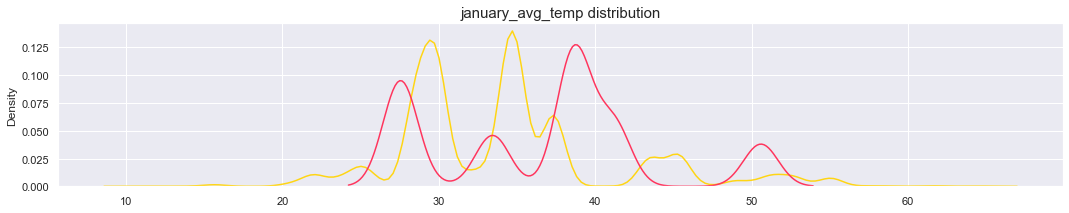

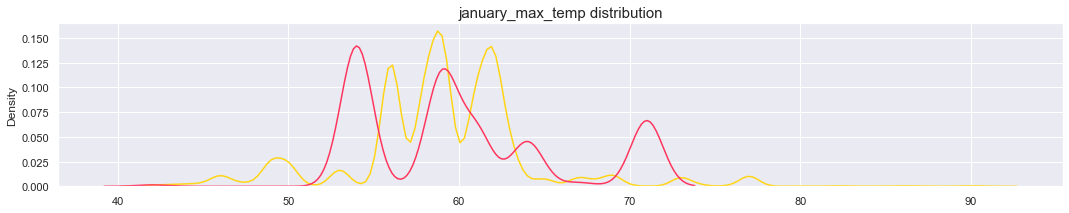

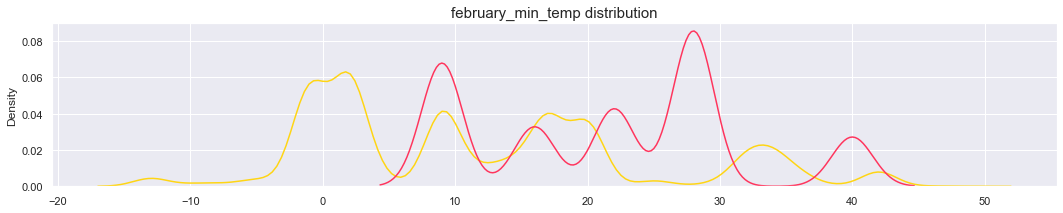

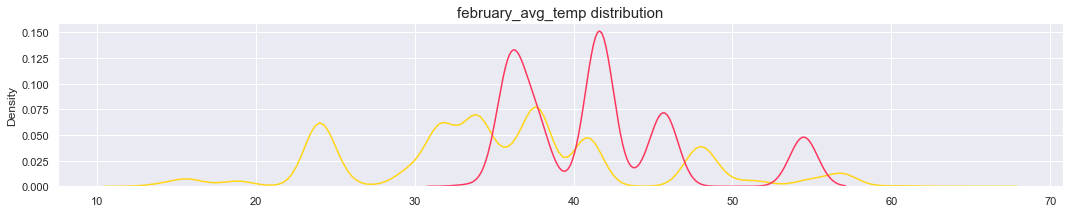

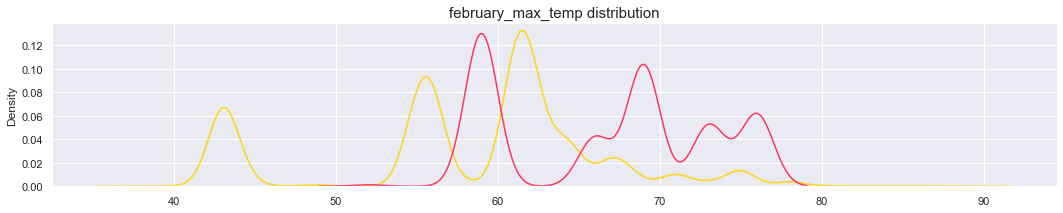

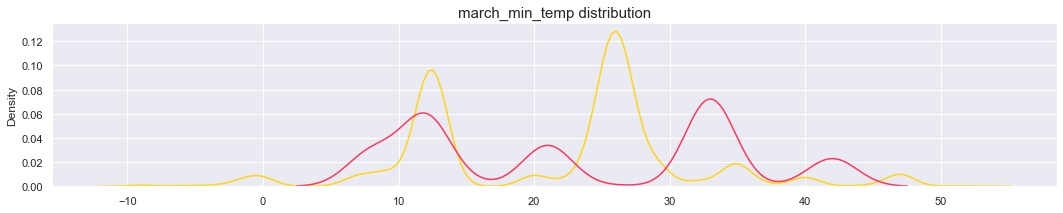

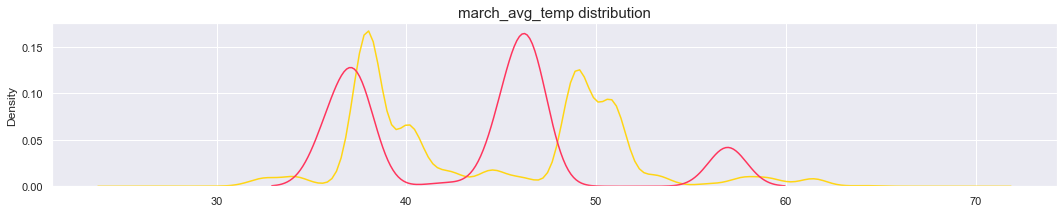

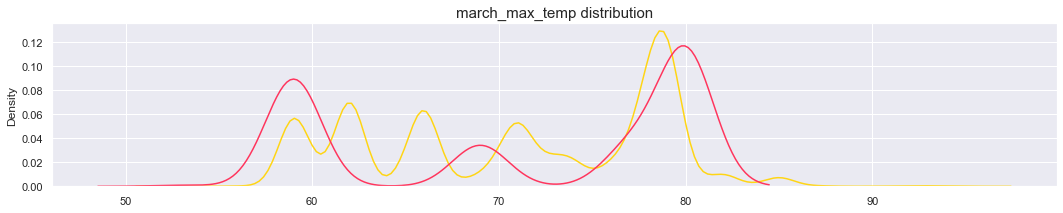

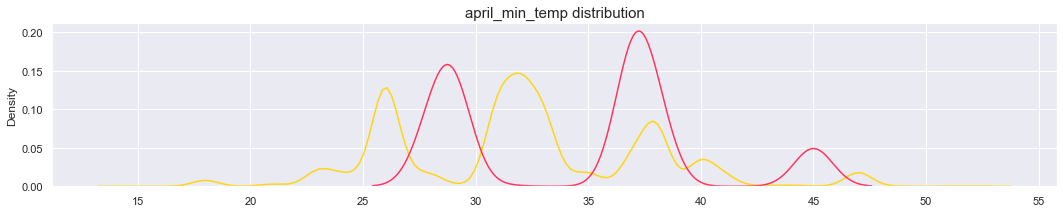

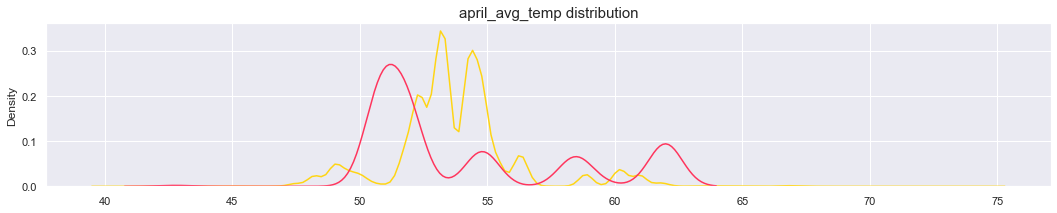

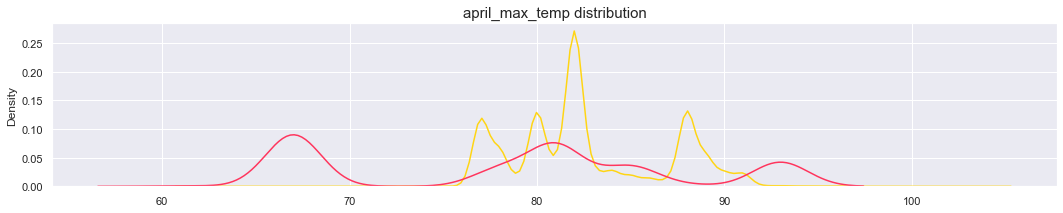

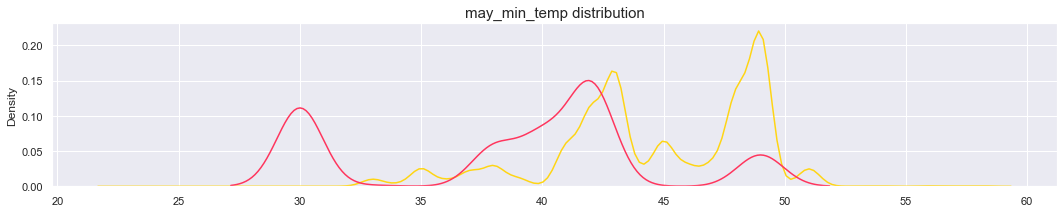

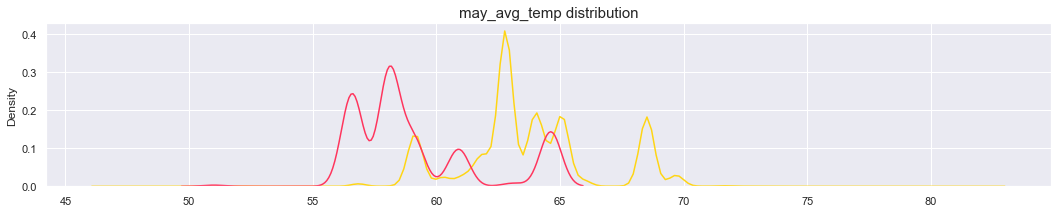

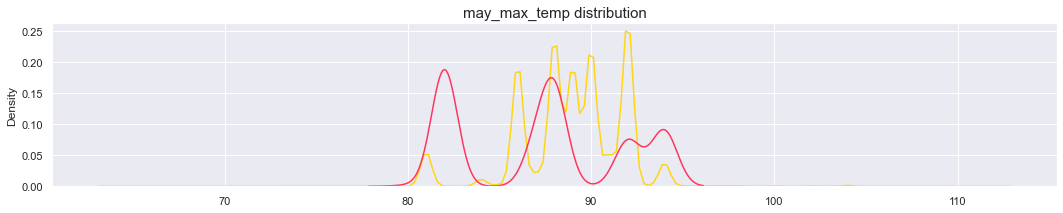

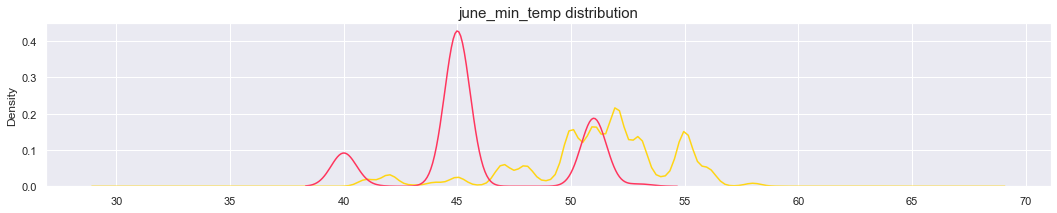

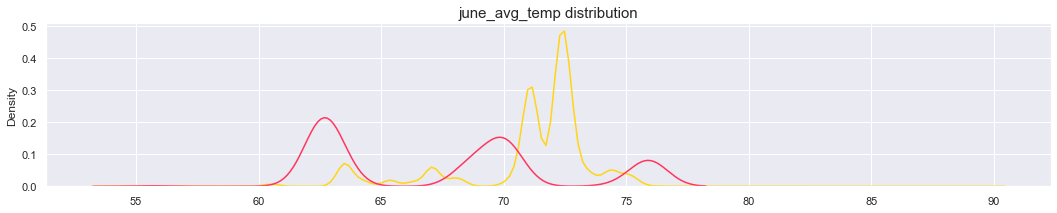

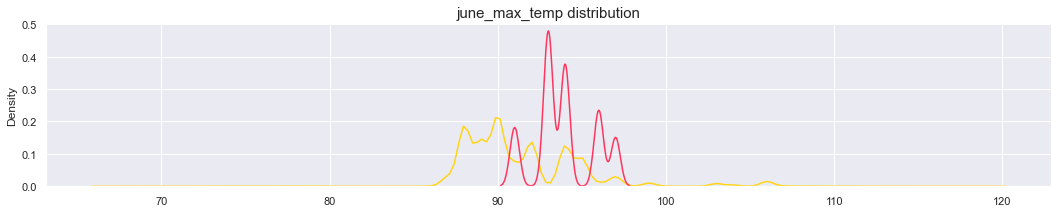

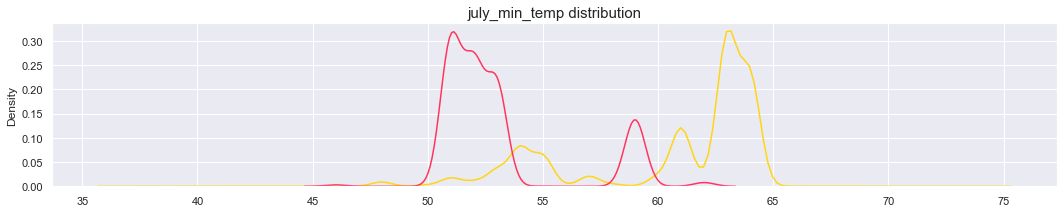

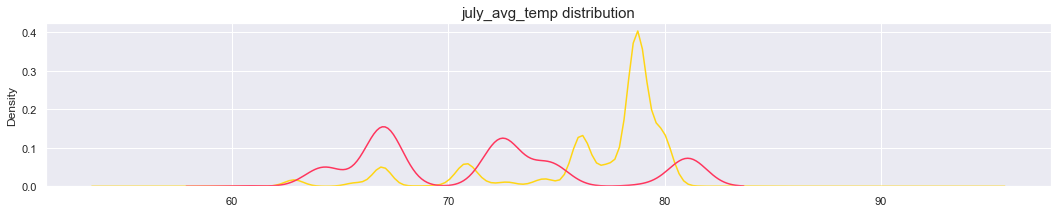

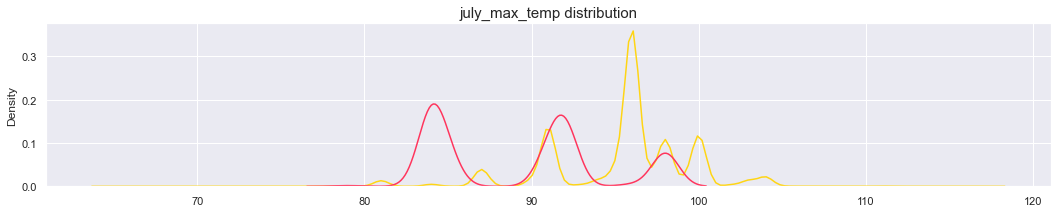

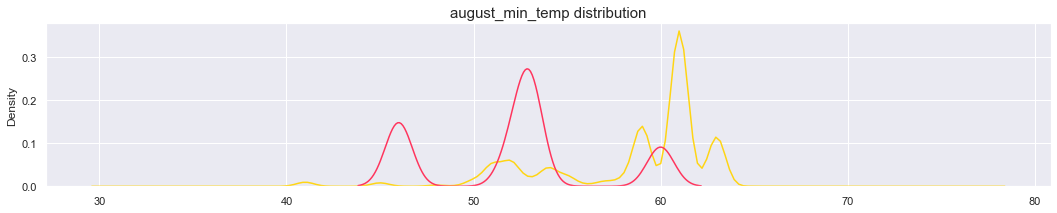

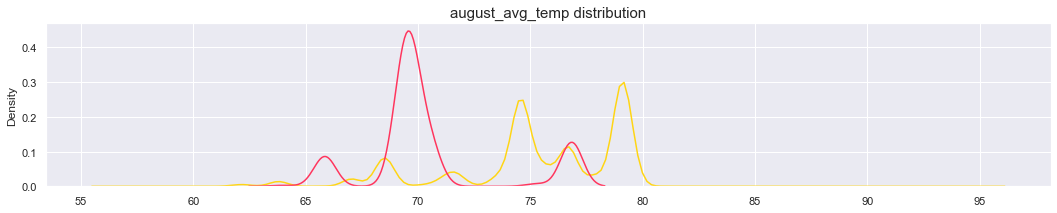

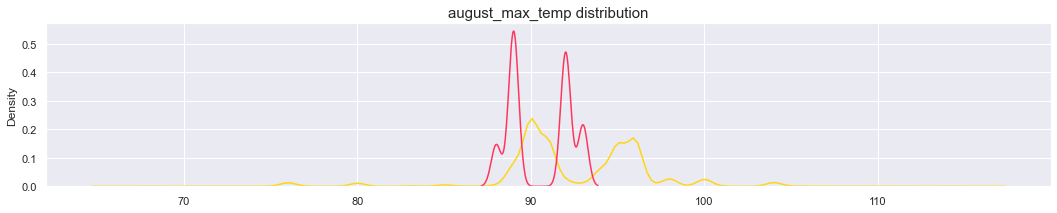

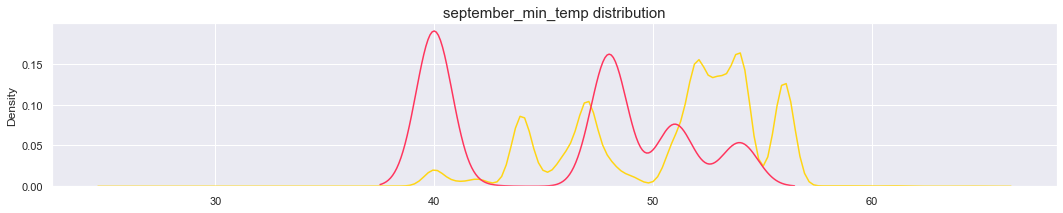

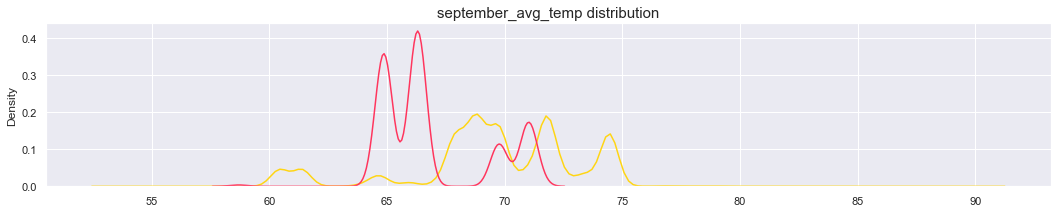

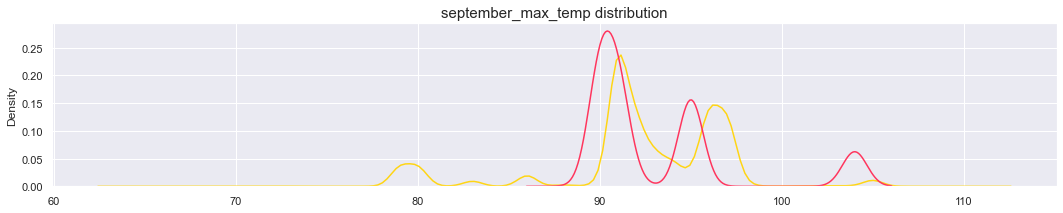

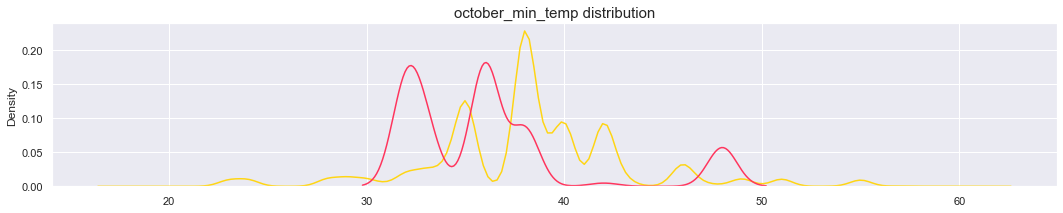

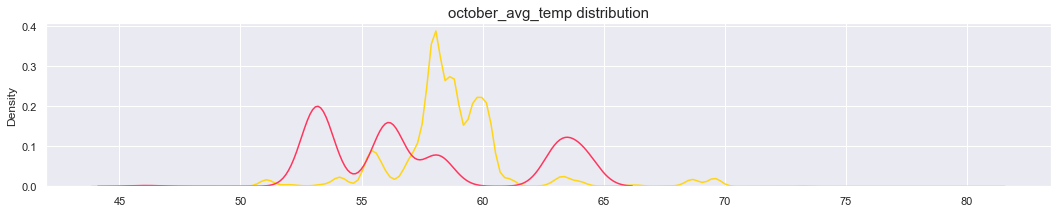

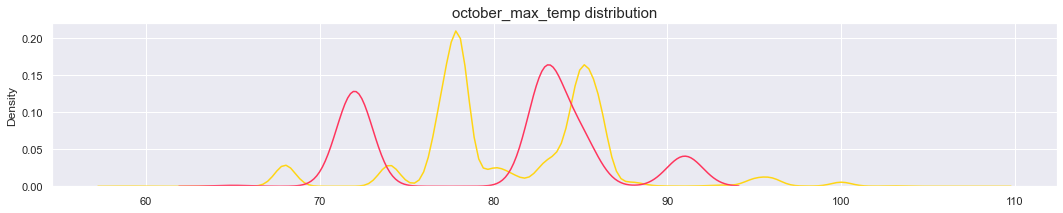

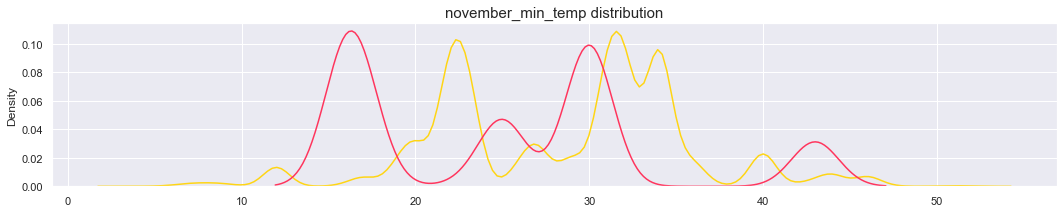

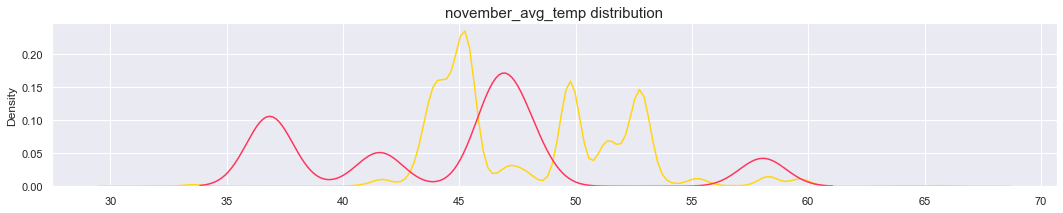

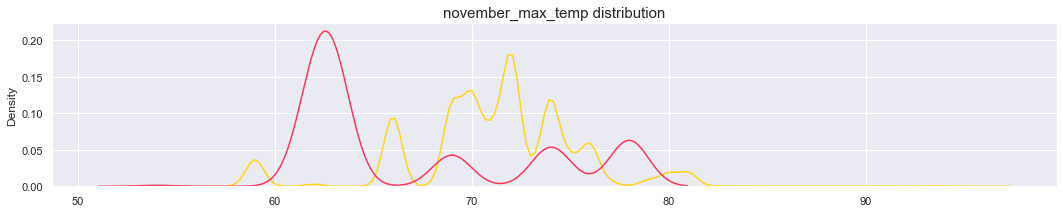

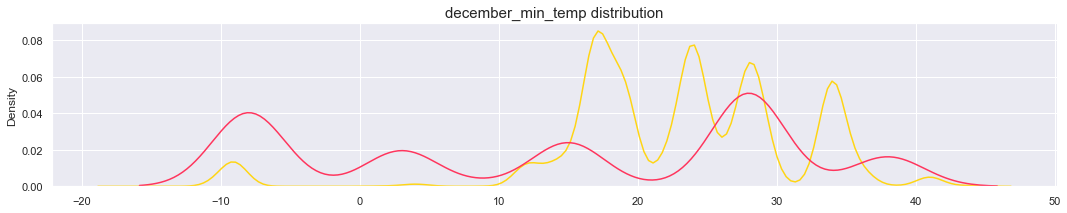

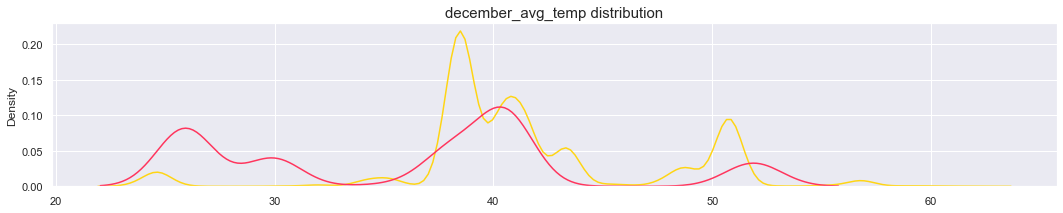

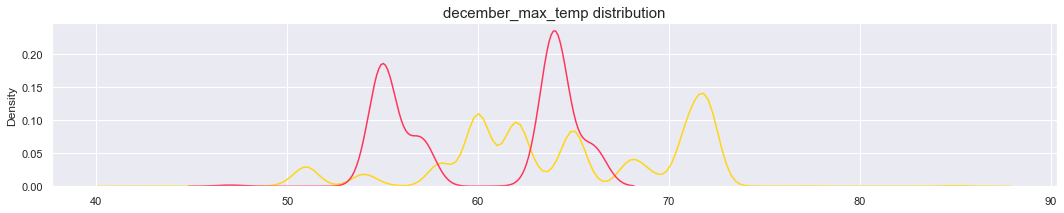

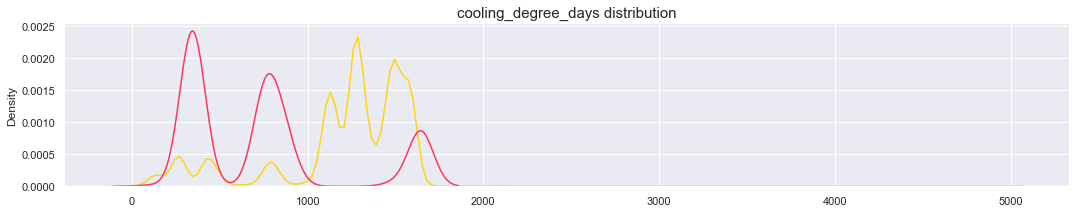

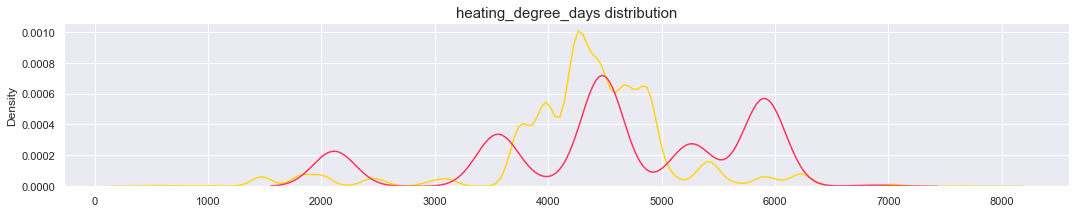

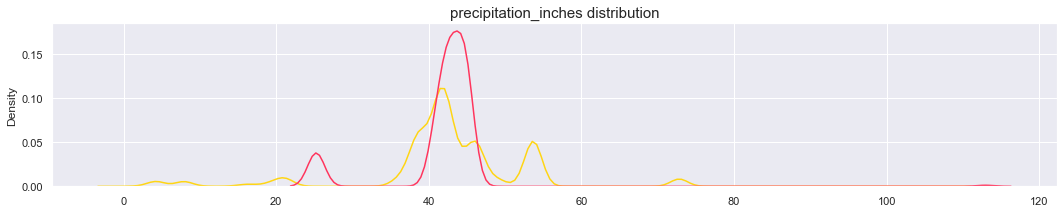

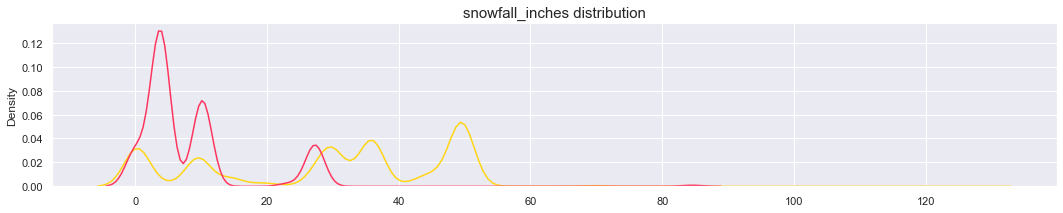

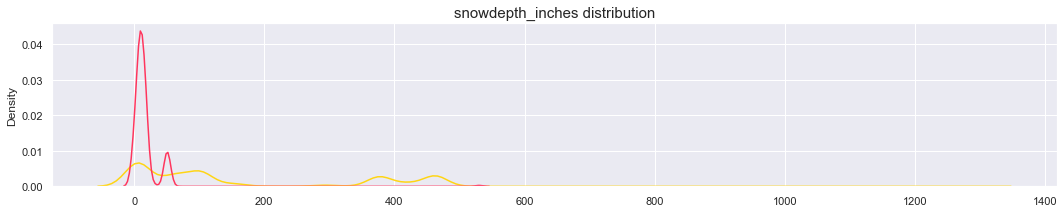

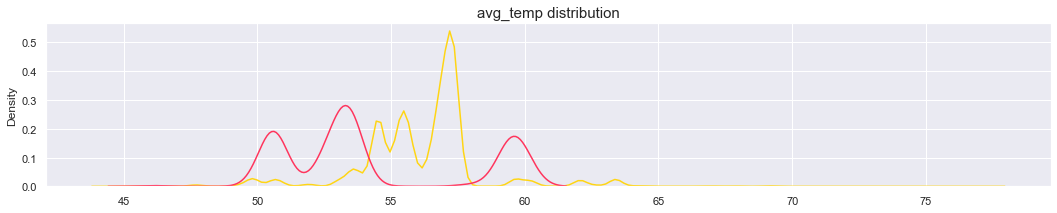

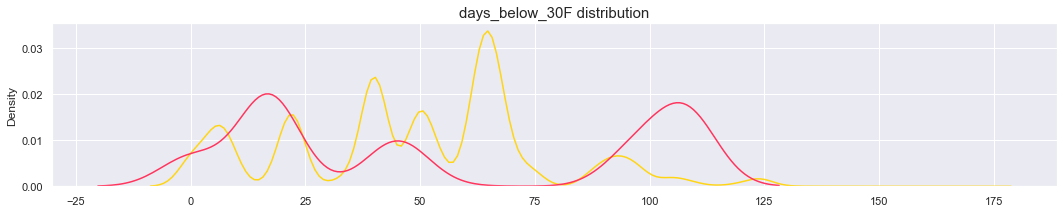

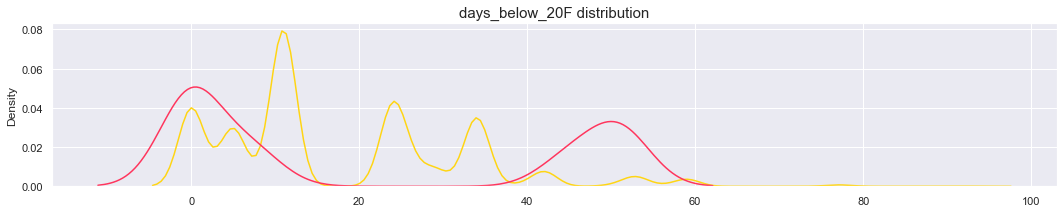

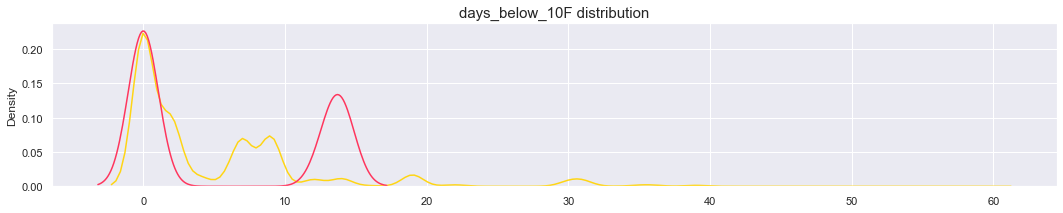

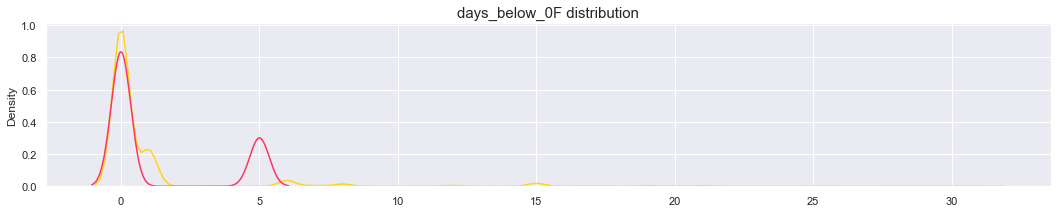

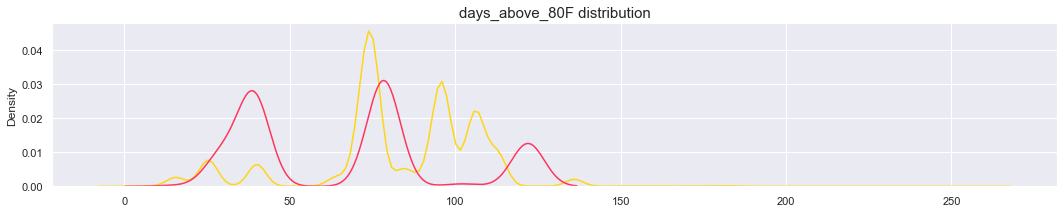

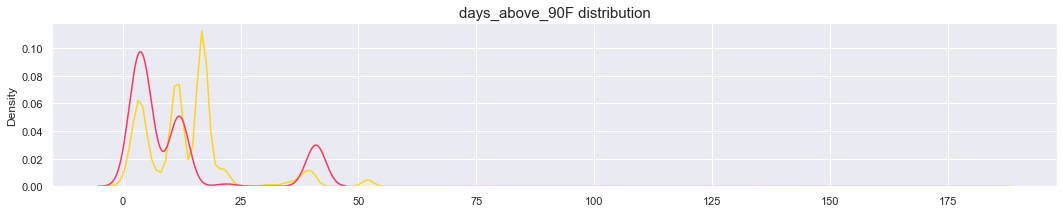

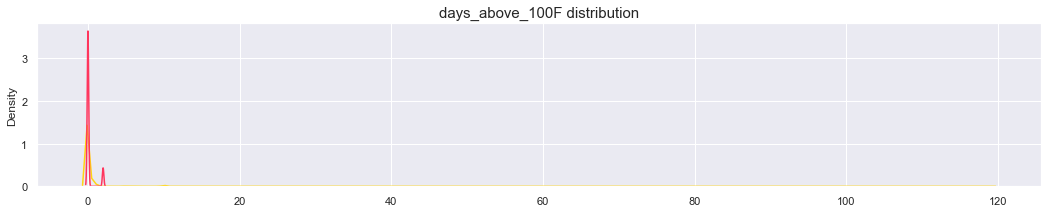

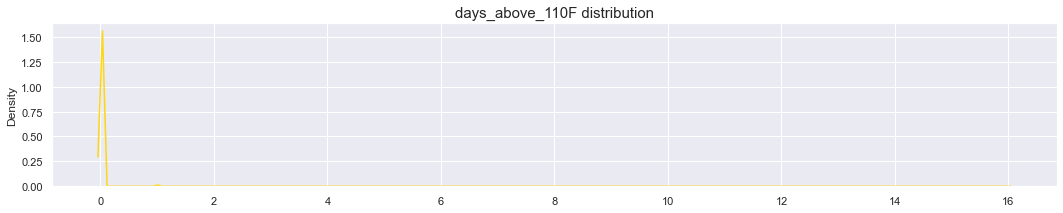

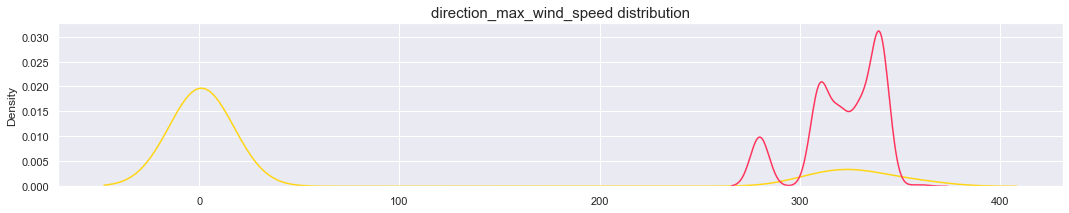

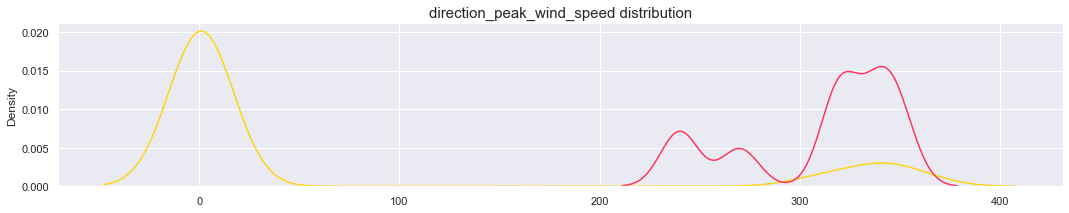

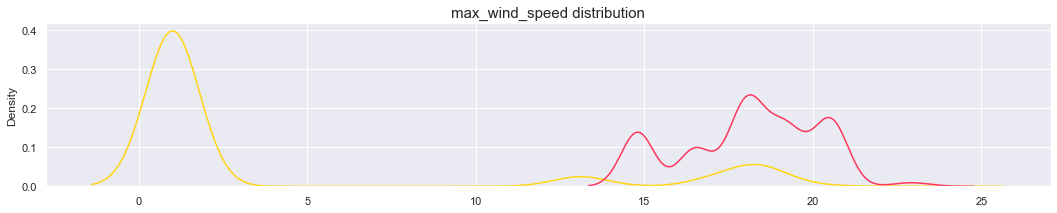

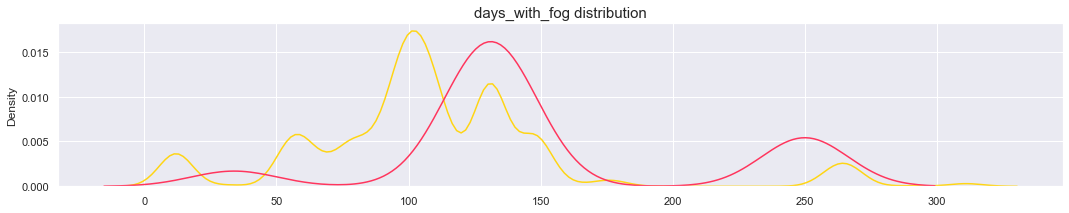

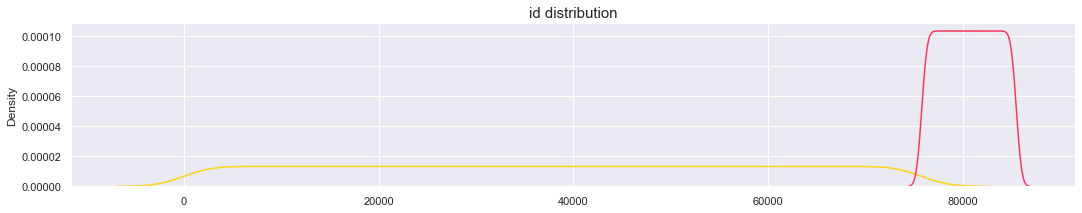

In [21]:
# plot distributions of features
for feature in numerical_cols:
    if feature != "site_eui":
        values_train = df[feature].to_numpy()
        values_test = test_df[feature].to_numpy()  

        plt.figure(figsize = (18, 3))

        sns.kdeplot(values_train, color = '#ffd514')
        sns.kdeplot(values_test, color = '#ff355d')

        plt.title(feature+' distribution', fontsize=15)
        plt.show();

        del values_train , values_test

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Correlation Analysis
     </p>

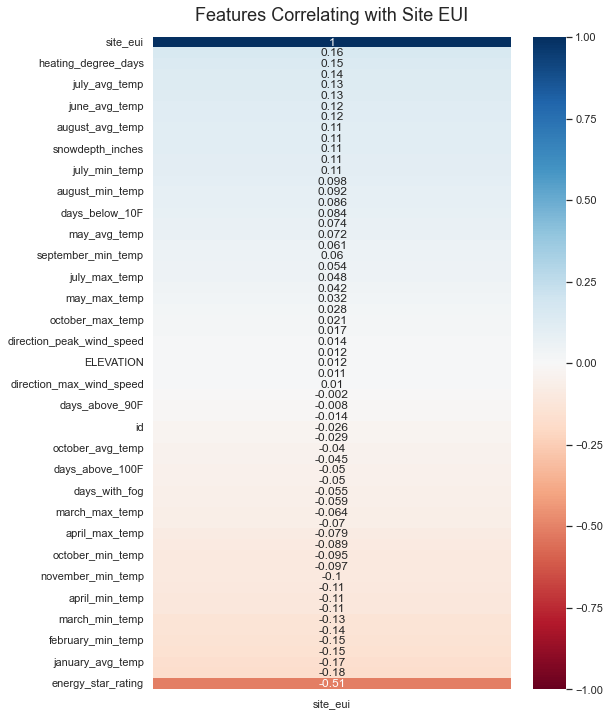

In [24]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['site_eui']].sort_values(by='site_eui', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Features Correlating with Site EUI', fontdict={'fontsize':18}, pad=16);

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:200%;">
Feature Engineering and Cleaning

 </p>

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Split Training Data
     </p>

In [41]:
test_df = test_df.drop(['Year_Factor', 'id'], axis=1)


X = df.drop(['site_eui', 'Year_Factor', 'id'], axis=1)
y = df['site_eui']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size=0.2)

In [42]:
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(60605, 61) (15152, 61) (60605,) (15152,)


<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Label Encoding
     </p>

In [43]:
le = LabelEncoder()

train_X['State_Factor']= le.fit_transform(train_X['State_Factor']).astype("uint8")
val_X['State_Factor']= le.transform(val_X['State_Factor']).astype("uint8")
test_df['State_Factor']= le.fit_transform(test_df['State_Factor']).astype("uint8")

train_X['building_class']= le.fit_transform(train_X['building_class']).astype("uint8")
val_X['building_class']= le.transform(val_X['building_class']).astype("uint8")
test_df['building_class']= le.fit_transform(test_df['building_class']).astype("uint8")

train_X['facility_type']= le.fit_transform(train_X['facility_type']).astype("uint8")
val_X['facility_type']= le.transform(val_X['facility_type']).astype("uint8")
test_df['facility_type']= le.fit_transform(test_df['facility_type']).astype("uint8")

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Handling Missing Values
     </p>

In [44]:
for col in ['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']:
    train_X[col] = train_X[col].fillna(train_X[col].median())
    val_X[col] = val_X[col].fillna(train_X[col].median())
    test_df[col] = test_df[col].fillna(train_X[col].median())
    
train_X.isna().sum().sum() # check if there is any null values left

0

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Feature Scaling
     </p>

In [45]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
val_X = scaler.transform(val_X)
test_df = scaler.transform(test_df)

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:200%;">
Feature Selection
 </p>

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:200%;">
Modeling, Prediction and Evaluation

 </p>

In [51]:
from sklearn.model_selection import GridSearchCV
xgb = xgboost.XGBRegressor()
parameters = {'objective':['reg:linear'],
              'learning_rate': [.02, .05, 0.01],
              'max_depth': [3,5],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.4],
              'n_estimators': [1000],
              'reg_alpha': [0.4],
              'reg_lambda': [2e-08]
}
xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        verbose=True)

xgb_grid.fit(train_X, train_y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[21:02:53] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:08] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:16] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:26] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:37] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:51] WARNING: /Users/travis/build/dmlc/x

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Prediction
     </p>

In [52]:
#testdata prediction
prediction = xgb_grid.best_estimator_.predict(test_df)
prediction 

array([253.19238 , 220.87138 , 303.6341  , ...,  39.806263,  43.17779 ,
        43.23078 ], dtype=float32)

In [54]:
submission= pd.read_csv('submissions/sample_solution.csv')
submission['site_eui'] = prediction
submission.to_csv("submissions/submission_1.csv",index=False)


In [55]:
submission.head()

,id,site_eui
0,75757,253.192383
1,75758,220.871384
2,75759,303.634094
3,75760,255.444382
4,75761,289.737457
